In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy

In [2]:
node_color = 'white'
edge_color = 'black'
edge_color_b = 'red'

def visualize_weighted_directed_graph(adjacency_matrix,pos=None):
    # グラフの作成
    G = nx.DiGraph()

    num_nodes = len(adjacency_matrix)
    G.add_nodes_from(np.arange(num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adjacency_matrix[i][j] > 0:
                G.add_edge(i, j, weight=adjacency_matrix[i][j])
            if adjacency_matrix[i][j] < 0:
                G.add_edge(j, i, weight=-adjacency_matrix[i][j])

    if pos == None:
        pos = nx.spring_layout(G)
    
    plt.figure(figsize=(2,4))
    edge_labels = {(i, j): f"{G[i][j]['weight']}" for i, j in G.edges()}
    nx.draw(G, pos, with_labels=True, node_color=node_color, edgecolors=edge_color,arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.show()

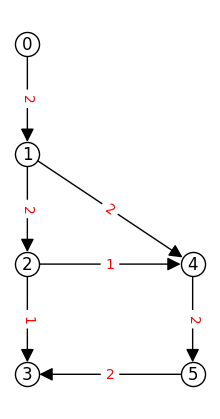

In [3]:
n_nodes = 6
edge_src = [0,1,1,2,2,5,4]
edge_trg = [1,2,4,3,4,3,5]
weights = [2,2,2,1,1,2,2]
adjacency_matrix = scipy.sparse.coo_matrix((weights , (edge_src, edge_trg)), shape=(n_nodes, n_nodes)).toarray()

pos = {0:[0,0],1:[0,-2],2:[0,-4],3:[0,-6],4:[0.8,-4],5:[0.8,-6]}
visualize_weighted_directed_graph(adjacency_matrix,pos=pos)

In [74]:

adj_coo.data
adj_coo.row

array([0, 1, 1, 2, 2, 4, 5])

In [9]:
def Hodge_decomposition(adjacency_matrix):
    adj_coo = scipy.sparse.coo_matrix(adjacency_matrix)
    n_edges = np.sum(adjacency_matrix>0)
    data_ = np.concatenate((np.full(n_edges,-1),np.full(n_edges,1)))
    rows_ = np.concatenate((np.arange(n_edges),np.arange(n_edges)))
    cols_ = np.concatenate((adj_coo.row,adj_coo.col))
    grad = scipy.sparse.coo_matrix((data_,(rows_,cols_)), shape=(n_edges,n_nodes))
    div = grad.T
    Lap = -div @ grad
    Lap_pinv = np.linalg.pinv(Lap.toarray())
    potential = Lap_pinv @ div @ adj_coo.data
    weights_grad = -grad @ potential
    weights_curl = adj_coo.data - weights_grad
    return potential, weights_grad, weights_curl

In [14]:
weights_curl

array([ 2.70894418e-14,  8.88178420e-16,  8.88178420e-16, -1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00])

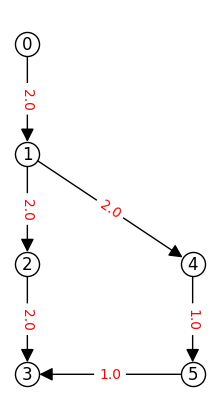

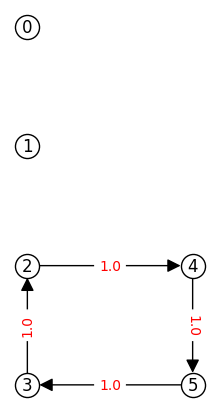

In [17]:
potential, weights_grad, weights_curl = Hodge_decomposition(adjacency_matrix)

adjacency_matrix_grad = scipy.sparse.coo_matrix((np.round(weights_grad, decimals=2), (edge_src, edge_trg)), shape=(n_nodes, n_nodes))
visualize_weighted_directed_graph(adjacency_matrix_grad.toarray(),pos=pos)

adjacency_matrix_curl = scipy.sparse.coo_matrix((np.round(weights_curl,decimals=2), (edge_src, edge_trg)), shape=(n_nodes, n_nodes))
visualize_weighted_directed_graph(adjacency_matrix_curl.toarray(),pos=pos)